Jair Sánchez


<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab06_ec_variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ecuaciones de una variable:

Para los siguiente problemas:


1.0 ¿Para que ángulo el area del segmento circular es igual a un cuarto del area de la circunferencia?

- Muestre que la expresión que permite resolver el problema:


\begin{equation}
\theta - \sin \theta = \frac{\pi}{2}
\end{equation}


- ¿Construya una grafica para theta?,  Alrededor de que punto esta solución.(Para este punto se recomienda emplear un data frame de pandas )

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobar la solución intuida del apartado anterior.


2.0 An object falling vertically through the air is subjected to viscous resistance as well as to the force
of gravity. Assume that an object with mass m is dropped from a height s0 and that the height of the
object after t seconds is

\begin{equation}
s(t)=s_0 - \frac{mg}{k}t+\frac{m^2g}{k}t(1-e^{-kt/m})
\end{equation}

where $g = 32.17 ft/s2$ and $k$ represents the coefficient of air resistance in $lbs/ft$. Suppose $s0 = 300 ft$,
$m = 0.25$ lb, and $k = 0.1$ lbs/ft. Find, to within $0.01$ s, the time it takes this quarter-pounder to hit the
ground

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobrar la solución.



3.0 En la teoria de campo medio, La magnetización como función de la temperatura de un material magnético  puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde m y T son la magnetizacion y temperatura reducida respectivamente

Para T = 0.5, determine:

a. La magnetización reducida empleando el metodo de la secante(Muestre su resultado con 4 cifras)

b. Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

d. Defina T = np.linspace(0.1,0.99,100), y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.



5. Construir un fractal empleando el metodo de Newton-Raphson,
(Reproducir código y entender)
\begin{equation}
z_{n+1} = z_n -a \frac{f(z)}{f'(z)}
\end{equation}



\begin{equation}
f'(z) = \frac{ f(z+h)+f(z) }{h}
\end{equation}


Replicar el codigo y entender.


```

import numpy as np
import matplotlib.pylab as plt
from PIL import Image

Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

#Definicion  la funcion y las derivada
def f(z):
  return z**3 - 1

def fp(z):
  return 3*z**2

h = 1E-4
def fpn(z, h):
  return (f(z+h)-f(z))/h
  

a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1
  y = -1
  for zy_ in zy:
      y = y + 1
      Z_0 = complex(zx_, zy_)
    
      for i in range(0, Niteraciones):
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break
          
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16
      
      image.putpixel((x,y), (r,g,b) )


plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)
```


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize


theta = lambda x: x - np.sin(x) - np.pi/2

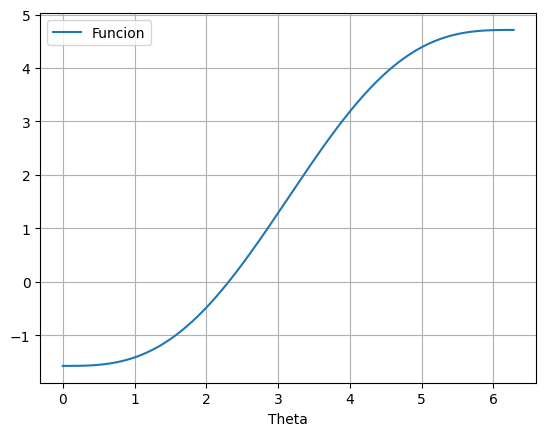

In [ ]:
x = np.arange(0,2*np.pi, 0.001)   #valores de theta
y = theta(x)   #valores evaluados en la funcion

#creemos una serie en pd

d= { "Theta": x, "Funcion": y}    #serie
df = pd.DataFrame(d)   #Creamos un dataframe


df.plot.line(x = "Theta", y = "Funcion")
plt.grid()
plt.show()

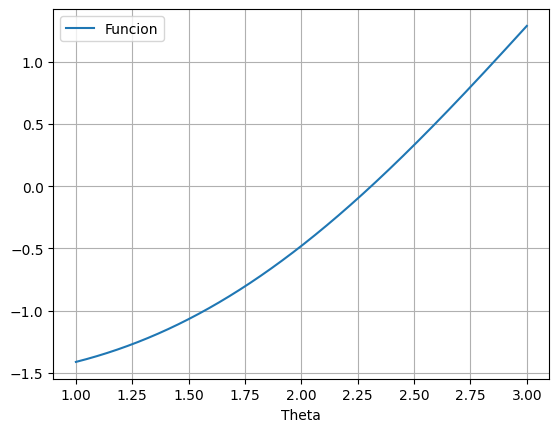

In [ ]:
#Buscamos donde es más cercano a cero. En este caso es en los valores de theta entre [2,3]
df_filtro= df[df.Theta.between(1,3)]
df_filtro.plot.line(x = "Theta", y = "Funcion")
plt.grid()
plt.show()

In [ ]:
df_filtro

,Theta,Funcion
1000,1.000,-1.412267
1001,1.001,-1.411807
1002,1.002,-1.411346
1003,1.003,-1.410884
1004,1.004,-1.410422
...,...,...
2996,2.996,1.280125
2997,2.997,1.282114
2998,2.998,1.284104
2999,2.999,1.286094


In [ ]:

xa=2.25
xb=2.55


def bic(xa,xb):
  epsilon=1E-9
  xc=0
  iter=0
  max=1000
  while (theta(xa)*theta(xb))<0 | iter<=max:
    iter=iter+1
    xc=(xa+xb)/2
    if theta(xc)<0:
      xa=xc
    elif theta(xc)>0:
      xb=xc
    elif abs(theta(xc))<epsilon:
      break
  return((xc))
bic(xa,xb)


2.3098814600100575

In [ ]:
#Metodo de bisección
#Escalar el numero en que empzamos  ahacer las iteraciones hasta enocntrar la raiz asociada.
#optimize.bisect(funcion, a, b )intervalo donde la funcion cambie de signo)


raiz = optimize.bisect(theta,2.30,2.31)
print("La raiz usando el metodos de biseccion será: ", raiz)

La raiz usando el metodos de biseccion será:  2.3098814600089104


In [ ]:
 #Metodo de Newton_ Rhapson

#optimize.newton(funcion, punti inicial, derivada)


theta = lambda x: x - np.sin(x) - np.pi/2

dtheta = lambda x: 1 - np.cos(x)

raiz_newton = optimize.newton(theta,2.30,dtheta)

print("La raiz usando el metodo de Newton-Rhapson es: ", raiz_newton)

La raiz usando el metodo de Newton-Rhapson es:  2.309881460010057


In [ ]:
#Metodo de punto fijo, hace una recursividad alreddor de un punto.
#Tomamos la funcion y siemre son restas alrededor de ese punto.
#optimize.fixed_point(funcion, punto fijo)

fixed_theta = lambda x: x - theta(x)

raiz_fijo = optimize.fixed_point(fixed_theta, 2.30)

print("La raiz usando el metodo de Punto fijo es: ", raiz_fijo)

La raiz usando el metodo de Punto fijo es:  2.3098814600100575


In [ ]:
#Metodo de la Raiz Secante. Es como la de Newton Rhapson, pero no es secesario meterle la derivada

raiz_secante = optimize.newton(theta, 2.30)

print("La raiz usando el metodo de la Secante es: ", raiz_secante)

La raiz usando el metodo de la Secante es:  2.3098814600100575


2.0 An object falling vertically through the air is subjected to viscous resistance as well as to the force
of gravity. Assume that an object with mass m is dropped from a height s0 and that the height of the
object after t seconds is

\begin{equation}
s(t)=s_0 - \frac{mg}{k}t+\frac{m^2g}{k}t(1-e^{-kt/m})
\end{equation}

where $g = 32.17 ft/s2$ and $k$ represents the coefficient of air resistance in $lbs/ft$. Suppose $s0 = 300 ft$,
$m = 0.25$ lb, and $k = 0.1$ lbs/ft. Find, to within $0.01$ s, the time it takes this quarter-pounder to hit the
ground

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobrar la solución.

In [ ]:
#variables

g = 32.17
s0 = 300
m = 0.25
k = 0.1


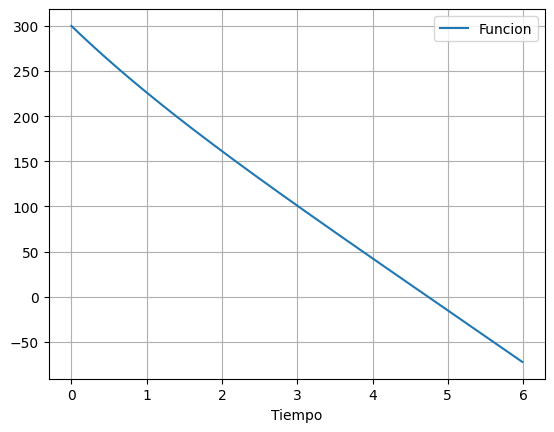

In [ ]:
f1 = lambda x: s0 - (m*g*x)/k + (((m**2)*g*x)*(1-np.exp((-k*x)/m)))/k
f1(4.8)

ex = np.exp((-k*x)/m)

x = np.arange(0,6, 0.01)
y = f1(x)

d= { "Tiempo": x, "Funcion": y}
df = pd.DataFrame(d)

df.plot.line(x = "Tiempo", y = "Funcion")
plt.grid()
plt.show()

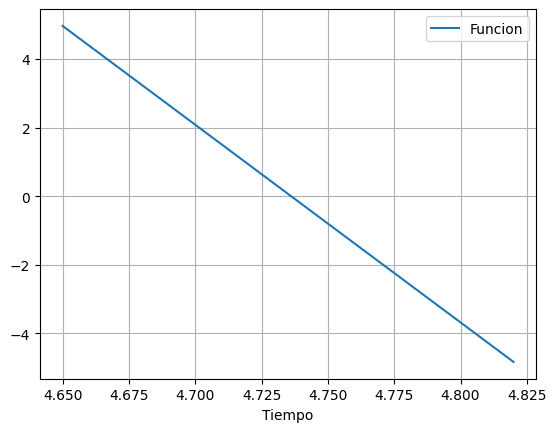

In [ ]:
df_filtro= df[df.Funcion.between(-5,5)]
df_filtro.plot.line(x = "Tiempo", y = "Funcion")
plt.grid()
plt.show()

In [ ]:
df_filtro

,Tiempo,Funcion
465,4.65,4.963346
466,4.66,4.387085
467,4.67,3.810841
468,4.68,3.234614
469,4.69,2.658402
470,4.70,2.082205
471,4.71,1.506024
472,4.72,0.929856
473,4.73,0.353702
474,4.74,-0.222439


In [ ]:
#Raiz con el metodo de bisección
raiz_bise = optimize.bisect(f1, 4.73,4.74)
print("La raiz con el metodo de Bisección es: ", raiz_bise)

La raiz con el metodo de Bisección es:  4.736139137604041


In [ ]:
#Raiz con el metodo de Newton-Rhapson

f1 = lambda x: s0 - (m*g*x)/k + (((m**2)*g*x)*(1-np.exp((-k*x)/m)))/k

df1 = lambda x: -(m*g)/k + ((m**2)*g)/k + ((m**2)*g*(np.exp((-k*x)/m)))/k - ((m**2)*g*x*k*(np.exp((-k*x)/m)))/(k*m)

raiz_new = optimize.newton(f1, 4.73,df1)

print("La raiz con el metodo de Newton-Rhapson es: ", raiz_new)

La raiz con el metodo de Newton-Rhapson es:  4.736139137392789


In [ ]:
#Raiz con el metodo de Punto fijo

puntofijo_nuevo = lambda x: x - f1(x)

raiz_pto = optimize.fixed_point(puntofijo_nuevo,4.73)

print("La raiz con el metodo del Punto fijo es: ", raiz_pto)


La raiz con el metodo del Punto fijo es:  4.73613913760349


In [ ]:
#Raiz con el metodo de la Secante

raiz_sec = optimize.newton(f1, 4.73)

print("La raiz con el metodo de la Secante es: ", raiz_sec)

La raiz con el metodo de la Secante es:  4.73613913760349


3.0 En la teoria de campo medio, La magnetización como función de la temperatura de un material magnético  puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde m y T son la magnetizacion y temperatura reducida respectivamente

Para T = 0.5, determine:

a. La magnetización reducida empleando el metodo de la secante(Muestre su resultado con 4 cifras)

b. Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

d. Defina T = np.linspace(0.1,0.99,100), y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.


\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

\begin{equation}
m(T) - \tanh\left( \frac{m(T)}{T} \right) = 0
\end{equation}

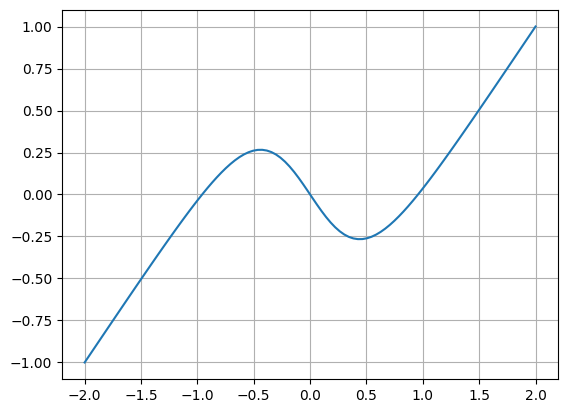

In [ ]:

def mag(m):
  T = 0.5
  return m - np.tanh(m/T)

m = np.linspace(-2,2,100)
plt.plot(m,mag(m))
plt.title("Magnetización")
plt.xlabel("")
plt.grid()
plt.show()


a. La magnetización reducida empleando el metodo de la secante(Muestre su resultado con 4 cifras)

In [ ]:
raiz = optimize.newton(mag,1)

ra=np.round(raiz,4)

print(f"La raiz positiva [hallada con el metodo de la secante], que representa la magnetizacion reducida es {ra}")



La raiz positiva [hallada con el metodo de la secante], que representa la magnetizacion reducida es 0.9575


b. Valide su respuestado con el metodo de punto fijo. (Muestre su resultado con 4 cifras)

In [ ]:
# si f(x) = x - g(x)
# f(m) = m - np.tanh(m/T)
#entonces g(x) = np.tanh(m/T)
T = 0.5
gfun = lambda m: np.tanh(m/T)

raiz_p = optimize.fixed_point(gfun,1)

raz = np.round(raiz_p,4)

print(f"La raiz positiva [hallada con el metodo de punto fijo], que representa la magnetizacion reducida es {raz}")

La raiz positiva [hallada con el metodo de punto fijo], que representa la magnetizacion reducida es 0.9575


d. Defina T = np.linspace(0.1,0.99,100), y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los 100 valores de T.

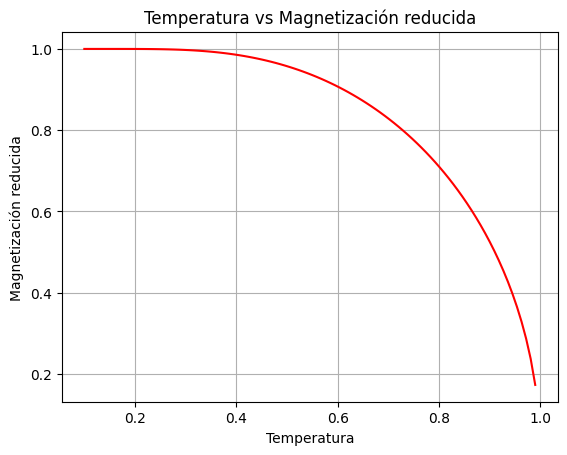

In [ ]:

def nmag(m,T):
  x= m - np.tanh(m/T)
  return x

T = np.linspace(0.1, 0.99, 100)
ra = []
for i in T:
  raizz = optimize.newton(nmag, 1, args=(i,))
  ra.append(raizz)

m = np.linspace(-2,2,100)
plt.plot(T,ra, "r")
plt.xlabel("Temperatura")
plt.ylabel("Magnetización reducida")
plt.title("Temperatura vs Magnetización reducida")

plt.grid()
plt.show()
  #print(T)






5. Construir un fractal empleando el metodo de Newton-Raphson,
(Reproducir código y entender)
\begin{equation}
z_{n+1} = z_n -a \frac{f(z)}{f'(z)}
\end{equation}



\begin{equation}
f'(z) = \frac{ f(z+h)+f(z) }{h}
\end{equation}


Replicar el codigo y entender.

Este fue el numero de iteraciones 69


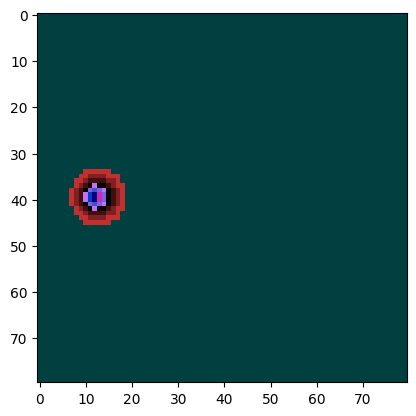

In [14]:
import numpy as np
import matplotlib.pylab as plt
from PIL import Image
import random


Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
# Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

# Definicion  la funcion y las derivada
def f(z):
  return np.exp(-z)-2
  #return z**2-7

def fp(z):
  return -np.exp(-z)
  #return 2*z

h = 1E-4
def fpn(z, h):
  return (f(z+h)-f(z))/h


a = 0.2
#Niteraciones = 100
#Niteraciones = 70
Niteraciones = random.randint(60,120)
print(f"Este fue el numero de iteraciones {Niteraciones}")
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1
  y = -1
  for zy_ in zy:
      y = y + 1
      Z_0 = complex(zx_, zy_)

      for i in range(0, Niteraciones):
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break

        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16

      image.putpixel((x,y), (r,g,b) )


plt.imshow(image)
# plt.xlim(400, 600)
# plt.ylim(400, 523)

Lo que hace el codigo anterior es crear una imagen con dimensiones establecidas, pero vacia.

Luego de eso crea un plano complejo en el que va a trabajar.

Luego define la función a la que le hallará los ceros con el metodo de Newton-Raphson, tambien se define la derivada de la función dicha anteriormente.

Luego, aplica a cada uno de los puntos del plano complejo (recorriendo cada pixel) el metodo de Newton-Raphson iterativamente hasta que converja o hasta que se cumpla el número de iteraciones establecidas  [*como aplicamos el metodo de Newton-Raphson para cualquier otra funcion anteriormente*]

Luego aplica color dependiendo del numero de iteraciones que se hagan para que el metodo funciones o converja.

**Para eso le genero un Niteraciones random para que se note como varia la imagen mostrada.**

Por ultimo, se muestra la imagen.
